In [1]:
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

In [2]:
def calc_d(x, y, L):
    if x-y-1 < 0:
        return L+x-y-1
    return x-y-1

In [3]:
def calc_x(x, v, L):
    if x+v >= L:
        return x+v-L
    return x+v

In [4]:
def avg_speed(road):
    v_arr = []
    for i in range(1, len(road)):
        sub = np.subtract(road[i], road[i-1])
        m_t = np.count_nonzero(sub == -1)
        v = m_t/np.count_nonzero(road[i])
        v_arr.append(v)
    return sum(v_arr)/(len(road))

In [5]:
def SN_model(L, v_max, p, density, steps):
    ncars = round(L*density)
    
    cars = np.zeros((ncars, 2))
    random_x = np.sort(np.random.choice(L, ncars, replace=False))
    random_v = np.random.choice(v_max+1, ncars)
    
    cars[:, 0] = random_x
    cars[:, 1] = random_v
    
    road = np.zeros((steps, L))

    road[0, cars[:, 0].astype(int)] = 1
    
    for t in range(1, steps):
        for i in range(ncars):
            if cars[i, 1] < v_max:
                cars[i, 1] = 1 + cars[i, 1]
            
            if i == ncars-1:
                dis = calc_d(cars[0, 0], cars[i, 0], L)
            else:
                dis = calc_d(cars[i+1, 0], cars[i, 0], L)
            
            if cars[i, 1] > dis:
                cars[i, 1] = dis
            
            if np.random.rand() < p and cars[i, 1] > 0: 
                cars[i, 1] = cars[i, 1] - 1
            
            cars[i, 0] = calc_x(cars[i, 0], cars[i, 1], L)
        road[t, cars[:, 0].astype(int)] = 1
    
    return road

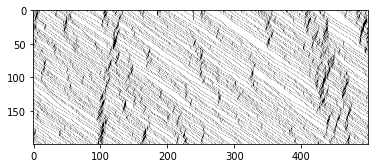

In [6]:
road = SN_model(500, 2, 0.5, 0.2, 200)
plt.imshow(road, cmap='Greys')

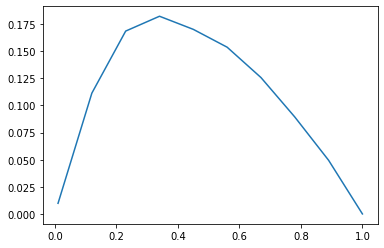

In [7]:
p_arr = []
v_avg = []
j_arr = []
for p in np.linspace(0.01, 1, 10):
    traffic = SN_model(500, 2, 0.5, p, 100)
    v = avg_speed(traffic)
    p_arr.append(p)
    v_avg.append(v)
    j_arr.append(v*p)
plt.plot(p_arr, j_arr)

ע"פ הגרף הנ"ל, בערך בצפיפות 0.4 מתחיל להיווצר פקקים.

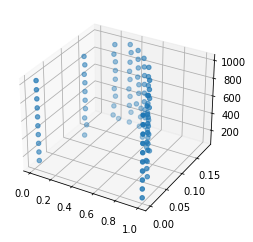

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
length_arr = []
p_arr = []
v_avg = []
j_arr = []
for length in range(100, 1001, 100):
    for p in np.linspace(0.01, 1, 10):
        traffic = SN_model(length, 2, 0.5, p, 100)
        v = avg_speed(traffic)
        p_arr.append(p)
        v_avg.append(v)
        j_arr.append(v*p)
        length_arr.append(length)
# it takes couple of seconds to run
ax.scatter(p_arr, j_arr, length_arr)

אפשר לראות שאורך הכביש לא משנה על הפקקים

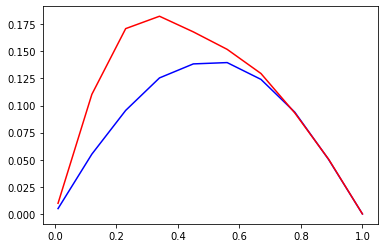

In [9]:
p_arr_2 = []
v_avg_2 = []
j_arr_2 = []
for p in np.linspace(0.01, 1, 10):
    traffic = SN_model(500, 2, 0.5, p, 100)
    v = avg_speed(traffic)
    p_arr_2.append(p)
    v_avg_2.append(v)
    j_arr_2.append(v*p)

p_arr_1 = []
v_avg_1 = []
j_arr_1 = []
for p in np.linspace(0.01, 1, 10):
    traffic = SN_model(500, 1, 0.5, p, 100)
    v = avg_speed(traffic)
    p_arr_1.append(p)
    v_avg_1.append(v)
    j_arr_1.append(v*p)

plt.plot(p_arr_1, j_arr_1, 'b', p_arr_2, j_arr_2, 'r')

 v_max = 1 ל 2 אין הבדל בין 

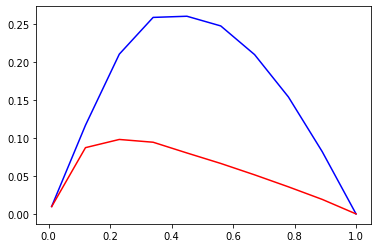

In [10]:
p_arr_02 = []
v_avg_02 = []
j_arr_02 = []
for p in np.linspace(0.01, 1, 10):
    traffic = SN_model(500, 2, 0.2, p, 100)
    v = avg_speed(traffic)
    p_arr_02.append(p)
    v_avg_02.append(v)
    j_arr_02.append(v*p)
p_arr_08 = []
v_avg_08 = []
j_arr_08 = []
for p in np.linspace(0.01, 1, 10):
    traffic = SN_model(500, 2, 0.8, p, 100)
    v = avg_speed(traffic)
    p_arr_08.append(p)
    v_avg_08.append(v)
    j_arr_08.append(v*p)
plt.plot(p_arr_02, j_arr_02, 'b')
plt.plot(p_arr_08, j_arr_08, 'r')

ככל שהסיכוי להאט גדול יותר, כך יש יותר פקקים

<IPython.core.display.Javascript object>


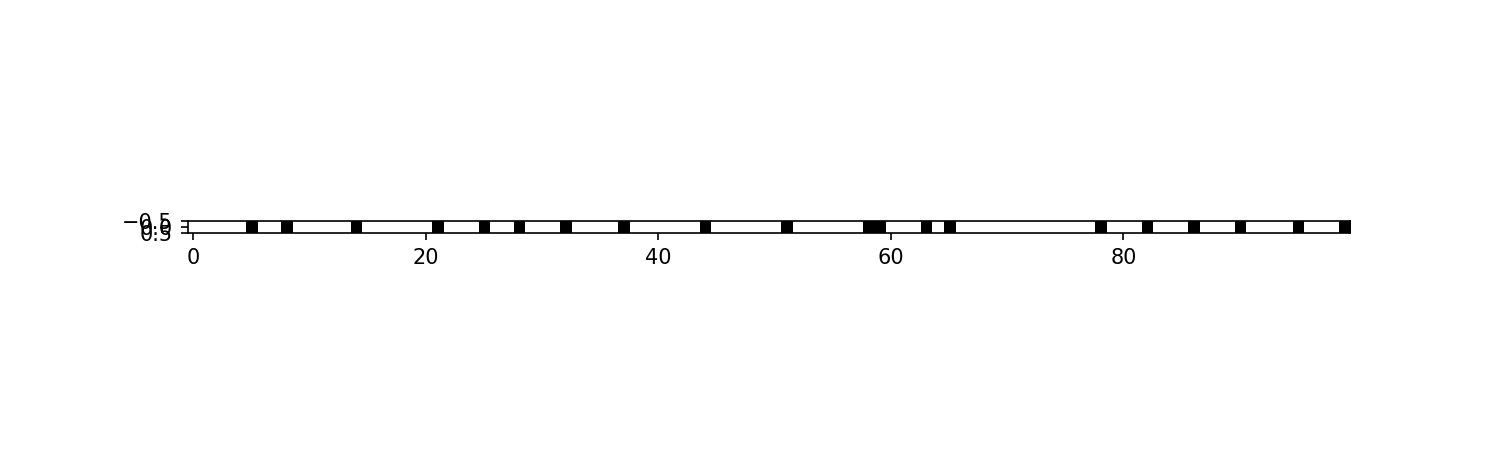

In [12]:
%matplotlib notebook
plt.figure(figsize=(10, 3))

road_2 = SN_model(100, 2, 0.5, 0.2, 100)

images = []
for i in range(len(road_2)):
    images.append(np.expand_dims(road_2[i],axis=0))
    
block = amp.blocks.Imshow(images, cmap='Greys')
anim = amp.Animation([block])
plt.show()